# Analysis of single events measured with prototype-1 of BoxSi
using $^{22}$Na source, to place 511 keV energy onto the charge deposition axis

last update Oct-11, 2020

In [1]:
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/PETsys/Software/analysis/Python'); 
from PETsys_analysis_tools import *;
main_figures_path = '/Users/erezcohen/Desktop/PETsys/write-ups/Prototype1/Figures/'

In [3]:
# replace \t by ',' and add the following header line into the data file:
# time1,e1,id1
Na22 = pd.read_csv('/Users/erezcohen/Desktop/PETsys/data/Prototype1/Na22_source/Na22_24092020_1115_7200sec_singels.txt')
Na22[0:2]

,time1,e1,id1
0,745287722098,22.318527,226
1,747025356823,5.224281,405


In [6]:
Na22_ch21 = Na22[Na22.id1==21]
Na22_ch290 = Na22[Na22.id1==290]

channels: [ 21  98 226 405 482]


PETsys_analysis_tools.py:49: RuntimeWarning: invalid value encountered in power
  linearisedQ = P0*(np.power(P1, np.power(Q,P2))) + P3*Q - P0


saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1/Figures/p1_22Na_singles_DeltaQ_repeatStrongerSource.pdf


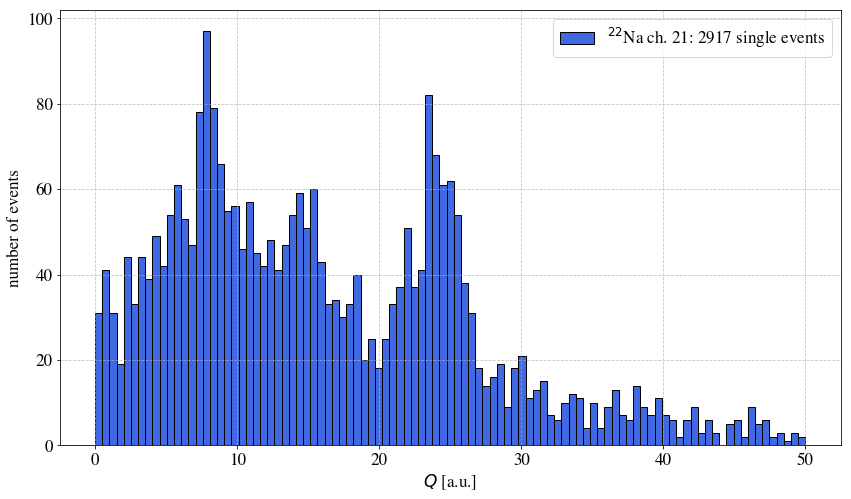

In [7]:
fig,ax=plt.subplots(figsize=(14,8));

hist_Na22_ch21,bins,patches = plt.hist(lineariseChargeDeposited(Na22_ch21.e1),bins=np.linspace(0,50,100),
         color='royalblue',edgecolor='black',label='$^{22}$Na ch. 21: %d single events'%(len(Na22_ch21)));
hist_Na22_ch290,bins,patches = plt.hist(lineariseChargeDeposited(Na22_ch290.e1),bins=np.linspace(0,50,100),
         color='salmon',edgecolor='black',label='$^{22}$Na ch. 290: %d single events'%(len(Na22_ch290)));
set_axes(ax=ax,x_label='$Q$ [a.u.]',y_label='number of events',
         fontsize=17,do_add_grid=True,do_add_legend=True,legend_loc='best');

save_figure(filename = main_figures_path + 'p1_22Na_singles_DeltaQ.pdf')

In [6]:
Na22 = pd.read_csv('/Users/erezcohen/Desktop/PETsys/data/Prototype1.2/Na22_source/Na22_29092020_1400_2000sec_singels.txt')
Na22[0:5]

,Time,charge,channel
0,739175086678,19.218868,277
1,748206361494,25.448139,149
2,761583832784,10.760384,226
3,770213368625,8.242352,149
4,798895471569,23.951572,354


In [7]:
channels = Na22.groupby('channel').groups.keys();
print 'channels:',channels

channels: [97, 98, 353, 226, 354, 149, 21, 277]


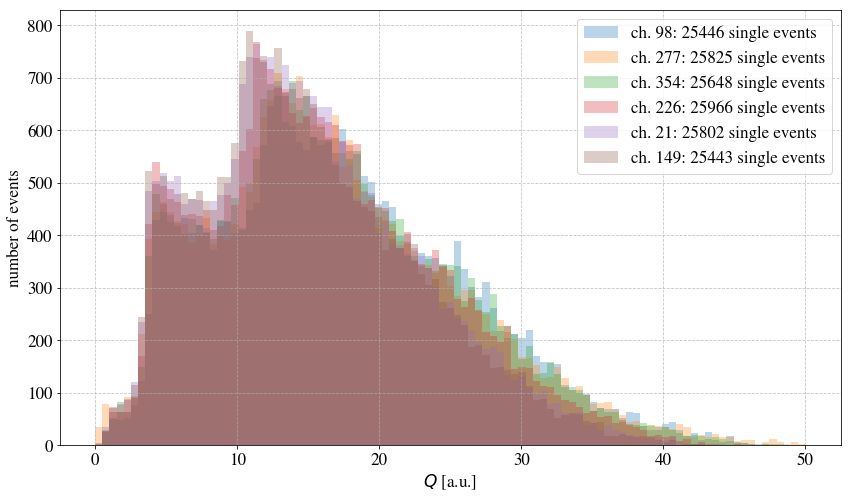

In [18]:
Na22_channels = dict()

fig,ax=plt.subplots(figsize=(14,8));
hist_Na22 = dict()
for ch in channels:
    Na22_channels[ch] = Na22[Na22.channel==ch]
        
    hist_Na22[ch],bins,patches = plt.hist(lineariseChargeDeposited(Na22_channels[ch].charge),bins=np.linspace(0,50,100),alpha=0.3,
             label='ch. %d: %d single events'%(ch,len(Na22_channels[ch])));
set_axes(ax=ax,x_label='$Q$ [a.u.]',y_label='number of events',
         fontsize=17,do_add_grid=True,do_add_legend=True,legend_loc='best');

# background, measured without a source
Oct-11, 2020

In [10]:
bkg = pd.read_csv('/Users/erezcohen/Desktop/PETsys/data/Prototype1.2/bkg/Bkg_11102020_0918_1800sec_single.dat')

channels: [98, 277, 354, 226, 21, 149]


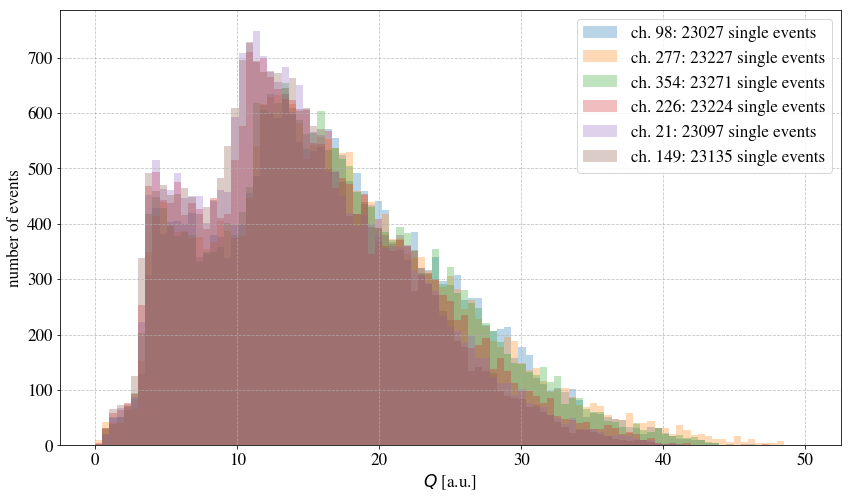

In [19]:
channels = bkg.groupby('channel').groups.keys();
print 'channels:',channels
bkg_channels = dict(); dT_bkg=1800; 
hist_bkg = dict()
fig,ax=plt.subplots(figsize=(14,8));
for ch in channels:
    bkg_channels[ch] = bkg[bkg.channel==ch]
    hist_bkg[ch],bins,patches = plt.hist(lineariseChargeDeposited(bkg_channels[ch].charge),
                                         bins=np.linspace(0,50,100),alpha=0.3,
                                         label='ch. %d: %d single events'%(ch,len(bkg_channels[ch])));
set_axes(ax=ax,x_label='$Q$ [a.u.]',y_label='number of events',
         fontsize=17,do_add_grid=True,do_add_legend=True,legend_loc='best');

In [22]:
# signal = total - background (statistical subtraction)
hist_signal = dict(); dT_Na22=2000; 
for ch in channels:
    hist_signal[ch] = hist_Na22[ch] - hist_bkg[ch]*(dT_Na22/dT_bkg)

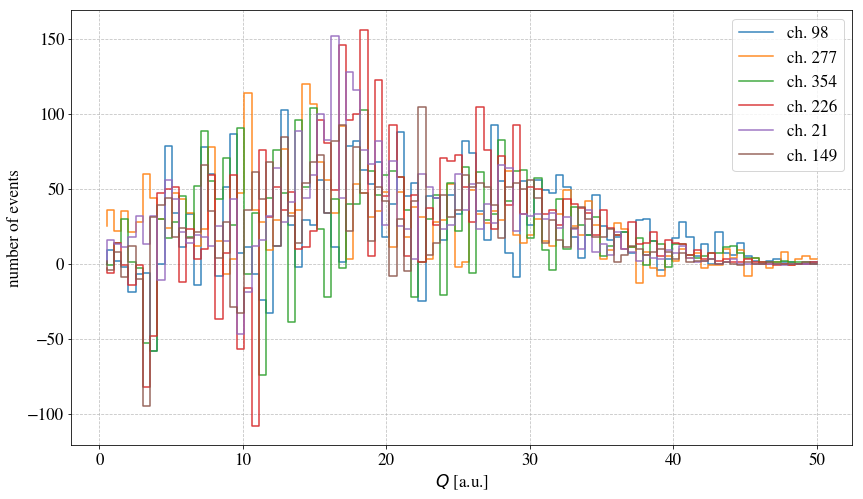

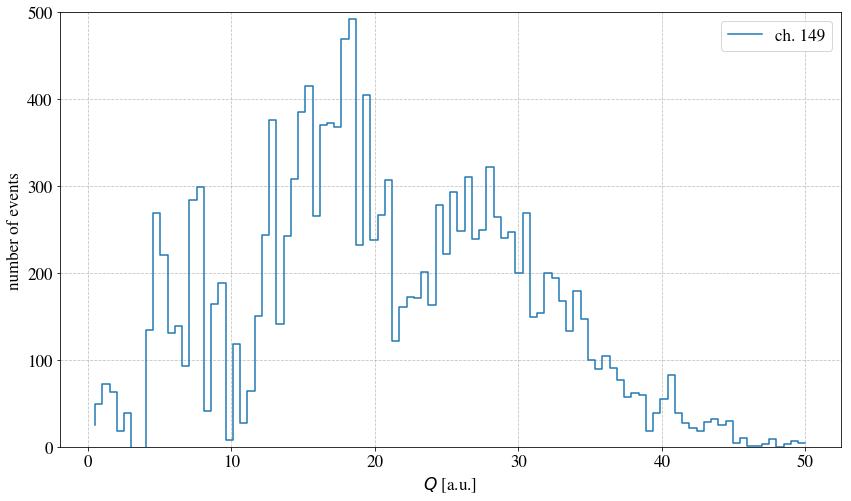

In [61]:
fig,ax=plt.subplots(figsize=(14,8));
hist_tot = np.zeros(len(bins[1:]))
for ch in channels:
    plt.step( bins[1:], hist_signal[ch] ,alpha=0.9,label='ch. %d'%(ch));
    hist_tot = hist_tot + hist_signal[ch]

set_axes(ax=ax,x_label='$Q$ [a.u.]',y_label='number of events',
         fontsize=17,do_add_grid=True,do_add_legend=True,legend_loc='best');

fig,ax=plt.subplots(figsize=(14,8));
plt.step( bins[1:], hist_tot ,label='ch. %d'%(ch));
set_axes(ax=ax,x_label='$Q$ [a.u.]',y_label='number of events',ylim=(0,500),
         fontsize=17,do_add_grid=True,do_add_legend=True,legend_loc='best');


# plot for report

saved /Users/erezcohen/Desktop/PETsys/write-ups/Prototype1/Figures/p1_22Na_singles_DeltaQ_signal_and_bkg.pdf


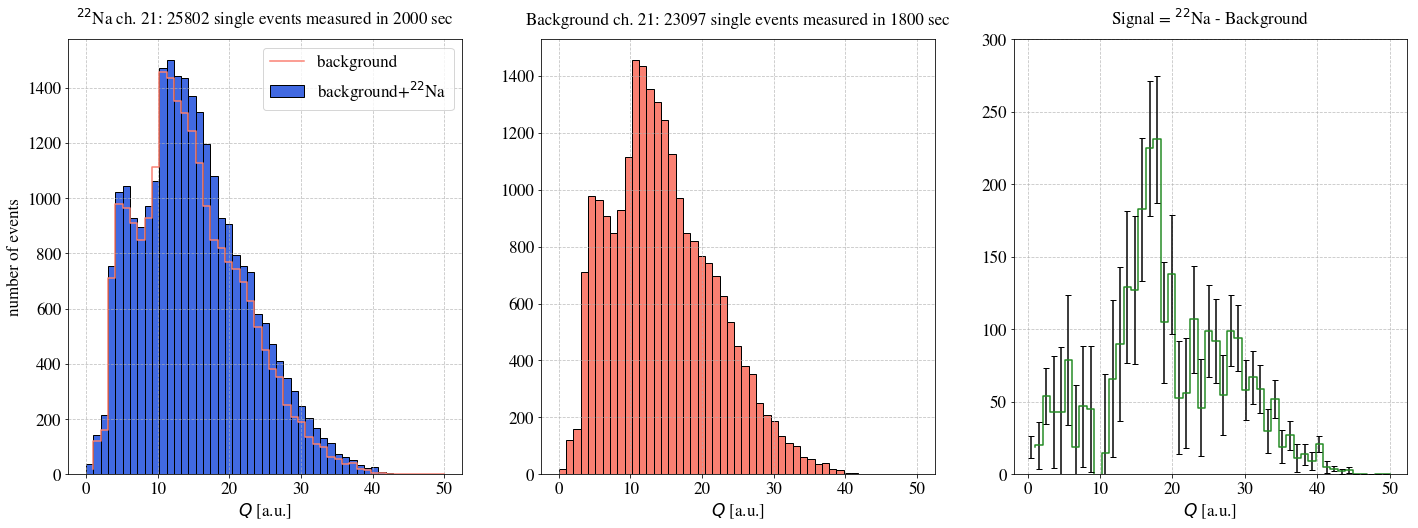

In [108]:
# bkg measurement channels [98, 277, 354, 226, 21, 149]
ch = 21
dT_Na22_ch21 = 2000;
dT_bkg = 1800;
bins=np.linspace(0,50,50)
bin_width = (bins[1]-bins[0])/2

fig=plt.figure(figsize=(24,8));

ax = fig.add_subplot(1,3,2)
hist_bkg_ch21,bins,patches = plt.hist(lineariseChargeDeposited(bkg_channels[ch].charge),
                                      bins=bins,color='salmon',edgecolor='black');

set_axes(ax=ax,x_label='$Q$ [a.u.]',title='Background ch. %d: %d single events measured in %d sec'%(ch,len(bkg_channels[ch]),dT_bkg),
         fontsize=17,do_add_grid=True,do_add_legend=False,legend_loc='best');

ax = fig.add_subplot(1,3,3)
hist_signal_ch21 = hist_Na22_ch21 - hist_bkg_ch21*(dT_Na22_ch21/dT_bkg)
hist_signal_ch21_error = np.sqrt( hist_Na22_ch21 + hist_bkg_ch21*(dT_Na22_ch21/dT_bkg) )

plt.step( bins[1:], hist_signal_ch21 , color='forestgreen' );
plt.errorbar( bins[1:]-bin_width, hist_signal_ch21, hist_signal_ch21_error ,marker='',capsize=3,
             color='black' , linestyle='None');

set_axes(ax=ax,x_label='$Q$ [a.u.]',title='Signal = $^{22}$Na - Background',ylim=(0,300),
         fontsize=17,do_add_grid=True,do_add_legend=False,legend_loc='best');

ax = fig.add_subplot(1,3,1)
hist_Na22_ch21,bins,patches = plt.hist(lineariseChargeDeposited(Na22_channels[ch].charge),bins=bins,
         color='royalblue',edgecolor='black',label='background+$^{22}$Na');
plt.step( bins[1:], hist_bkg_ch21*(dT_Na22_ch21/dT_bkg) , color='salmon' , label='background');

set_axes(ax=ax,x_label='$Q$ [a.u.]',y_label='number of events',
         title='$^{22}$Na ch. 21: %d single events measured in %d sec'%(len(Na22_channels[ch]),dT_Na22_ch21),
         fontsize=17,do_add_grid=True,do_add_legend=True,legend_loc='best');

save_figure(filename = main_figures_path + 'p1_22Na_singles_DeltaQ_signal_and_bkg.pdf')